In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
#run from repo root...
os.chdir(r"C:/Users/jamed\Documents/repos/lidar_2/LidarClassifcationForFloodModelling")

In [6]:
from structured_data_utils.structuring import GeotiffGeneration, get_combined_geotiff_tensor

In [7]:
GeotiffGeneration.generate_geotiffs()

In [13]:
combined_tensor = get_combined_geotiff_tensor()

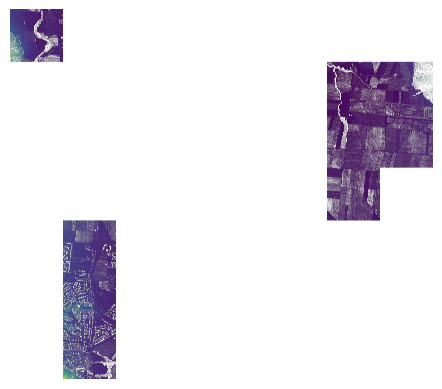

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_tensor(tensor):
    image_np = tensor.detach().cpu().numpy().astype(np.float32)

    if image_np.ndim == 3 and image_np.shape[0] <= 4:
        image_np = np.moveaxis(image_np, 0, -1)  # CHW → HWC

    if image_np.ndim == 2:
        image_np = image_np[:, :, None]

    if image_np.shape[2] > 3:
        image_np = image_np[:, :, :3]

    vmin = np.nanmin(image_np, axis=(0, 1), keepdims=True)
    vmax = np.nanmax(image_np, axis=(0, 1), keepdims=True)

    image_np = (image_np - vmin) / (vmax - vmin + 1e-8)

    plt.imshow(image_np.squeeze())
    plt.axis("off")
    plt.show()


visualize_tensor(combined_tensor)

In [ ]:
image_np = combined_tensor.detach().cpu().numpy().astype(np.float32)
print(image_np[0][6][12]) #looking at x than y...
print(combined_tensor[0])

32.858
tensor([[    nan, 33.1200, 33.1200,  ...,     nan,     nan,     nan],
        [33.0800, 33.0900, 33.0950,  ...,     nan,     nan,     nan],
        [33.0800, 33.0900, 33.0950,  ...,     nan,     nan,     nan],
        ...,
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan]])
